In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Survival_Analysis_in_Python/datasets/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prison = pd.read_csv(path_data+'rossi.csv').drop(columns=['Unnamed: 0', 'race'])
display(prison.head(), prison.shape)

,week,arrest,fin,age,wexp,mar,paro,prio
0,20,1,0,27,0,0,1,3
1,17,1,0,18,0,0,1,8
2,25,1,0,19,1,0,1,13
3,52,0,1,23,1,1,1,1
4,52,0,0,19,1,0,1,3


(432, 8)

In [3]:
# exercise 01

"""
Model prison data with Cox PH

The DataFrame prison contains information from 432 convicts who were released and followed up for one year after release. You have modeled their time-to-arrest and studied what factors increase or decrease their risk of re-arrest using the Weibull AFT model.

CoxPHFitter class of lifelines implements a Cox Proportional Hazards model for survival regression that models the baseline hazard function and hazard ratios that define hazard proportions. Let's try using CoxPHFitter to explore the factors!

The pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame and its column names as needed.
"""

# Instructions

"""

    Import the CoxPHFitter class from lifelines.
    Create an instance of CoxPHFitter called cph.
---

    Fit cph with appropriate columns from prison by specifying the values for both duration_col and event_col parameters.
---

    Get the model summary of cph and print it.
---
Question

0.01, 0.05, and 0.1 are common thresholds to use for interpreting significance. Based on the model summary in the console, which sets of covariates are statistically significant at the 0.05 level? You may need to scroll to see all the columns.
(Age, prio)
"""

# solution

# Import CoxPHFitter class
from lifelines import CoxPHFitter

# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

# Fit cph to data
cph.fit(df=prison, duration_col="week", event_col="arrest")

# Print model summary
print(cph.summary)

#----------------------------------#

# Conclusion

"""
Good job! This means there is a strong correlation between the changes in age and prio and the hazards.
"""

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
fin       -0.365536   0.693825  0.190900       -0.739693        0.008621   
age       -0.056326   0.945231  0.021887       -0.099223       -0.013428   
wexp      -0.156989   0.854714  0.212081       -0.572660        0.258682   
mar       -0.471303   0.624189  0.380268       -1.216615        0.274009   
paro      -0.077919   0.925039  0.195299       -0.460698        0.304861   
prio       0.089662   1.093805  0.028711        0.033389        0.145935   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
fin                   0.477260             1.008659     0.0 -1.914802   
age                   0.905541             0.986662     0.0 -2.573486   
wexp                  0.564023             1.295222     0.0 -0.740230   
mar                   0.29

'\nGood job! This means there is a strong correlation between the changes in age and prio and the hazards.\n'

In [4]:
# exercise 02

"""
Custom Cox PH model

You have isolated three factors that are statistically significant at the 0.05 level in the previous exercise: fin, age, and prio.

    fin: if the convict received financial assistance, hazards decrease by 31%;
    age: for each age older than average, hazards decrease by 5%;
    prio: for each prior arrest more than average, hazards increase by 9%.

Let's build a custom Cox PH model using these covariates.

The CoxPHFitter class has been imported for you, and the pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame prison and its column names as needed.
"""

# Instructions

"""

    Instantiate a CoxPHFitter class called custom_cph.
    Fit custom_cph with a custom regression model fin + age + prio using the formula parameter.
    Get the model summary of cph and print it.

"""

# solution

# Instantiate CoxPHFitter class
custom_cph = CoxPHFitter()

# Fit custom model
custom_cph.fit(df=prison, duration_col='week', event_col='arrest', formula='fin+age+prio')

# Print model summary
print(custom_cph.summary)

#----------------------------------#

# Conclusion

"""
Nicely done! When there are many covariates, the problem of overfitting and multicollinearity might also exist for survival regression models. Read here about more advanced regularization techniques for CoxPHFitter.
(https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.ParametricSplinePHFitter.fit)
"""

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
fin       -0.346954   0.706838  0.190247       -0.719832        0.025923   
age       -0.067105   0.935097  0.020851       -0.107972       -0.026239   
prio       0.096893   1.101743  0.027253        0.043478        0.150309   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
fin                   0.486834             1.026262     0.0 -1.823703   
age                   0.897653             0.974102     0.0 -3.218397   
prio                  1.044437             1.162193     0.0  3.555273   

                  p   -log2(p)  
covariate                       
fin        0.068197   3.874147  
age        0.001289   9.599426  
prio       0.000378  11.370906  


'\nNicely done! When there are many covariates, the problem of overfitting and multicollinearity might also exist for survival regression models. Read here about more advanced regularization techniques for CoxPHFitter.\n(https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.ParametricSplinePHFitter.fit)\n'

In [14]:
# exercise 03

"""
Cox PH model survival time

You used both the Weibull AFT model and the Cox PH model to model time-to-arrest for convicts. Using the Weibull AFT model, you estimated the impact on survival time from changes in the covariates.

Could you do the same with the Cox PH model? Fit the Cox PH model to the prison data and calculate the impact on survival time from a one unit increase in prio (number of prior arrests).

The CoxPHFitter class has been imported for you, and the pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame and its column names as needed.
"""

# Instructions

"""

    Instantiate a CoxPHFitter class and call it cph.
    Fit cph to the DataFrame prison with all columns as covariates, except columns week and arrest.
---

    Get the model summary and assign it to a new DataFrame variable called summary_df.
---

    Create a new column called surv_ratio by dividing 1 by the exp(coef) column of summary_df.
    Print the value of surv_ratio for prio using .loc.
---
Question

Based on the column you just created, what is the impact on time-to-arrest with a one-unit increase in prio?
(decreases by 8.6%)
"""

# solution

# Instantiate CoxPHFitter class
cph = CoxPHFitter()

# Fit cph to data using all columns
cph.fit(df=prison, duration_col="week", event_col="arrest")

# Assign summary to summary_df
summary_df = cph.summary

# Create new column of survival time ratios
summary_df["surv_ratio"] = 1 / summary_df['exp(coef)']

# Print surv_ratio for prio
print(summary_df.loc['prio', "surv_ratio"])

#----------------------------------#

# Conclusion

"""
Great job! The survival time interpretation of the Cox PH model coefficients is intuitive and comparable to how we interpret the Weibull AFT model coefficients.
"""

0.9142399599880768


'\nGreat job! The survival time interpretation of the Cox PH model coefficients is intuitive and comparable to how we interpret the Weibull AFT model coefficients.\n'

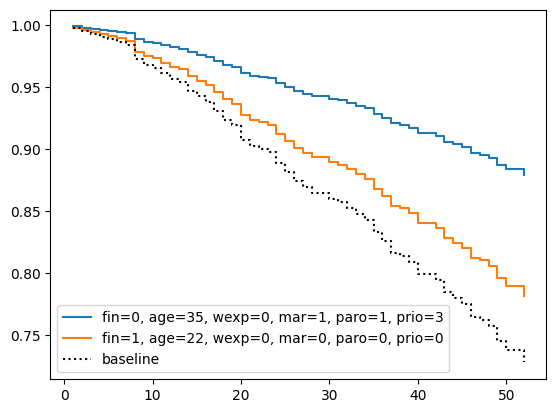

"\nGreat job! Marie is more likely to be arrested sooner because her survival probabilities are lower than those of Jack's.\n"

In [15]:
# exercise 04

"""
Plot covariate effects on survival

Two convicts are on the waitlist to be released. You want to predict their survival function for time-to-arrest using the CoxPHFitter model you just fitted. The covariate values for the individuals are listed below:
Name 	fin 	age 	wexp 	mar 	paro 	prio
Jack 	0 	35 	0 	1 	1 	3
Marie 	1 	22 	0 	0 	0 	0

Plot Jack's and Marie's survival curves side-by-side with the baseline survival curve using cph. The fitted model cph has been loaded for you.

The CoxPHFitter class has been imported and the matplotlib.pyplot module has been imported as plt. The pandas and numpy libraries are imported as pd and np, respectively.
"""

# Instructions

"""

    Use .plot_partial_effects_on_outcome() to specify the covariate values (listed above) for Jack and Marie and plot their survival curves.
    Show the plot.

"""

# solution

# Plot partial effects
cph.plot_partial_effects_on_outcome(covariates=['fin','age','wexp','mar','paro','prio'],
         values=[
             [0,35,0,1,1,3],
             [1,22,0,0,0,0]
         ])

# Show plot
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! Marie is more likely to be arrested sooner because her survival probabilities are lower than those of Jack's.
"""

In [18]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

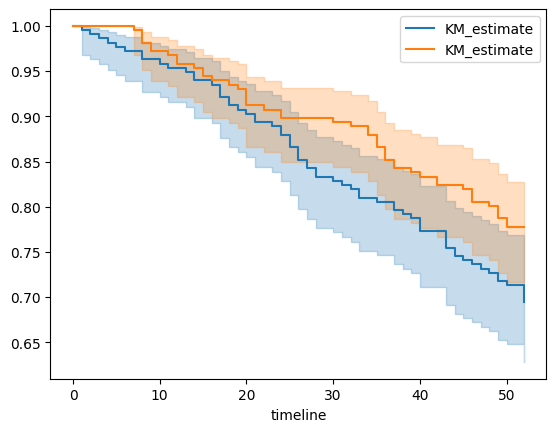

'\nGood job! Despite being a visual and seemingly relaxed check, Kaplan-Meier curves that seem parallel indicate the proportional hazards assumption is satisfied.\n'

In [19]:
# exercise 05

"""
Test the PH assumption with KM curves

After learning about the proportional hazards assumption, you realize that the Cox PH model you built using prison DataFrame has not been tested. You will test the proportional hazards assumption for the categorical variable fin using Kaplan-Meier curves.

cph is the fitted Cox PH model using all columns, and it has been loaded. A KaplanMeierFitter class kmf has also been instantiated.

The CoxPHFitter class, the KaplanMeierFitter class, and the matplotlib.pyplot module have been imported. The pandas and numpy libraries are imported as pd and np, respectively.
"""

# Instructions

"""

    Fit kmf to the data of convicts that did not receive financial assistance (fin: 0).
    Plot the survival curve of kmf and assign the plot to a variable named ax.
---

    Fit kmf to the data of convicts that received financial assistance (fin: 1), plot its survival curve on ax. Show the plot.
---
Question

Based on the plotted Kaplan-Meier curves, does the covariate fin satisfy the proportional hazards assumption?
(Yes)
"""

# solution

# Fit to fin == 0
kmf.fit(durations=prison[prison["fin"] == 0]["week"], 
        event_observed=prison[prison["fin"] == 0]["arrest"])

# Plot survival curve for fin == 0
ax = kmf.plot()

# Fit to fin == 1 and plot on ax
kmf.fit(durations=prison[prison["fin"] == 1]["week"], 
        event_observed=prison[prison["fin"] == 1]["arrest"])
kmf.plot(ax=ax)
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! Despite being a visual and seemingly relaxed check, Kaplan-Meier curves that seem parallel indicate the proportional hazards assumption is satisfied.
"""

In [20]:
# exercise 06

"""
Test the PH assumption automatically

For other continuous variables in prison, you will test the proportional hazards assumption using the .check_assumptions() method.

cph is the fitted Cox PH model using all columns, and it has been loaded.

The CoxPHFitter class has been imported. The pandas and numpy libraries are imported as pd and np, respectively.
"""

# Instructions

"""

    Use .check_assumptions() at significance level 0.1 to check the proportional hazards assumption for prison.

"""

# solution

# Check PH assumption
print(cph.check_assumptions(training_df=prison, p_value_threshold=0.1))

#----------------------------------#

# Conclusion

"""
Great job! As the output suggests, the proportional hazards assumption test using .check_assumptions() can be overly strict and there are many ways to mitigate the problem.
(https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html)
"""

The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.51 <0.005     10.50
     rank           11.93 <0.005     10.83
fin  km              0.00   0.95      0.08
     rank            0.00   0.96      0.06
mar  km              0.78   0.38      1.41
     rank            0.90   0.34      1.54
paro km              0.16   0.69      0.54
     rank            0.18   0.67      0.58
prio km              0.02   0.89      0.16
     rank            0.01   0.90      0.15
wexp km              7.86   0.01      7.63
     rank            7.70   0.01      7.50



1. Variable 'age' failed the non-proportional test: p-value is 0.0006.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0050.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

'\nGreat job! As the output suggests, the proportional hazards assumption test using .check_assumptions() can be overly strict and there are many ways to mitigate the problem.\n(https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html)\n'

In [42]:
employees = pd.read_csv(path_data+'employees_clean.csv')
display(employees.head(),employees.shape)

,Attrition,YearsAtCompany,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DistanceFromHome,PerformanceRating,HourlyRate,StockOptionLevel
0,1,6,2,4,1,1,1,3,94,0
1,0,10,3,2,4,3,8,4,61,1
2,1,0,4,3,2,3,2,3,92,0
3,0,8,4,3,3,3,3,3,56,0
4,0,2,1,2,4,3,2,3,40,1


(1470, 10)

In [43]:
# exercise 07

"""
Employee churn study

Acquiring new employees as replacements incurs hiring costs and training costs. You want to predict how long current employees will stay. This exercise focuses on the first steps to prepare to make predictions.

You have a DataFrame called employees. It contains data about 1470 employees (churned and present) and how their survey answers. The survey is across the following dimensions:

    environment_satisfaction
    job_satisfaction
    relationship_satisfaction
    work_life_balance

Additionally, years_at_company means the duration employees have worked and attrition indicates if the employee has churned (1 if churn, 0 otherwise).

Sample rows are printed for you in the console. The CoxPHFitter class is imported for you from the lifelines package.
"""

# Instructions

"""

    Instantiate a CoxPHFitter object.
    Fit the CoxPHFitter model object with your data using all other columns.
---

    Create a new DataFrame current_employees for all employees that are still present.
    Create a new variable current_employees_last_obs for the durations column of DataFrame current_employees.

"""

# solution

# Instantiate a CoxPHFitter object cph
cph = CoxPHFitter()

# Fit cph on all covariates
cph.fit(employees, 'YearsAtCompany', event_col='Attrition')

# Select employees that have not churned
current_employees = employees.loc[employees['Attrition'] == 0]

# Existing durations of employees that have not churned
current_employees_last_obs = current_employees['YearsAtCompany']

#----------------------------------#

# Conclusion

"""
Good job! Now you can predict when present employees might churn based on the fitted survival function and the variables you created.
"""

'\nGood job! Now you can predict when present employees might churn based on the fitted survival function and the variables you created.\n'

In [44]:
# exercise 08

"""
Predict before they leave!

In this exercise, you will use the variables you just created to predict how long current employees will stay.

In the previous exercise, you fitted the data to a CoxPHFitter model object called cph. You also created the following variables to use for prediction:

    current_employees: DataFrame for all employees that are still present.
    current_employees_last_obs: Series referring to the durations column of DataFrame current_employees.

The model object cph you just fitted the data to, DataFrame current_employees, and Series current_employees_last_obs are loaded for you. Now you can use them to help the HR department with this prediction task!
"""

# Instructions

"""

    Use cph to predict the survival function for individuals in current_employees, given how long they have already worked for.
---

    Use the .predict_median() method of the model object cph to predict when current employees are going to leave.
    Print the smallest median remaining time. When is the next employee likely to leave?

"""

# solution

# Predict survival function conditional on existing durations
cph.predict_survival_function(current_employees, 
                              conditional_after=current_employees_last_obs)

# Predict median remaining times for current employees
pred = cph.predict_median(current_employees, conditional_after=current_employees_last_obs)

# Print the smallest median remaining time
print(np.min(pred))

#----------------------------------#

# Conclusion

"""
Congratulations, you did it! You're now able to predict survival durations in Python. Tweet us your feedback and tell us what you think.
"""

2.0


"\nCongratulations, you did it! You're now able to predict survival durations in Python. Tweet us your feedback and tell us what you think.\n"